In [14]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

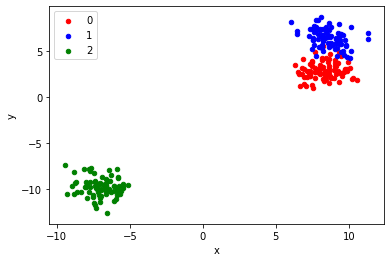

In [47]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=250, centers=3, n_features=2)
# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [48]:
df.sample(5)

,x,y,label
191,9.028839,5.215751,1
69,-6.719636,-10.128840,2
24,9.292180,6.986139,1
115,-9.299247,-10.522300,2
217,-6.973311,-10.157654,2


In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [50]:
X=df.iloc[:,0:2].values
y=df.iloc[:,-1].values
sc=StandardScaler()
X=sc.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print("Classification")
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

Classification
(200, 2) (50, 2) (200,) (50,)


In [51]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)    
y_pred=clf.predict(X_test)

In [52]:
print(accuracy_score(y_test,y_pred))

0.94


In [53]:
a=np.arange(start=X_train[:,0].min()-1,stop=X_train[:,0].max()+1,step=0.01)
b=np.arange(start=X_train[:,1].min()-1,stop=X_train[:,1].max()+1,step=0.01)
XX,YY=np.meshgrid(a,b)
print(a.shape,b.shape,XX.shape,YY.shape)
arr=np.array([XX.ravel(),YY.ravel()]).T
print(arr.shape)

(482,) (505,) (505, 482) (505, 482)
(243410, 2)


In [54]:
labels=clf.predict(arr)


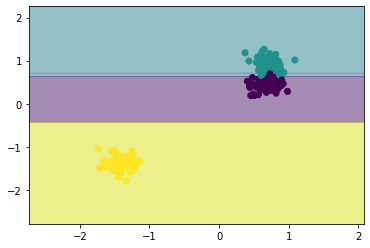

In [55]:
plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.50)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

In [76]:
def DT(X,y,k=25):

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

    clf = DecisionTreeClassifier(max_depth=k)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)

    training_score = accuracy_score(y_train, clf.predict(X_train))
    test_score = accuracy_score(y_test,y_pred)

    return training_score, test_score

max overfitting 0.07999999999999996 at depth 24
max underfitting 0.030000000000000027 at depth 2


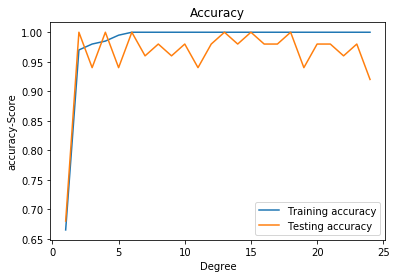

In [105]:
train=[]
test=[]
error1=0
error2=0
x1=0
x2=0
depth1=0
depth2=0
for i in range(1,25):
    r2train,r2test=DT(X,y,k=i)
    if(r2train>r2test):
        x1=r2train-r2test
    else:
        x2=r2test-r2train
    if(error1<x1):
        error1=x1
        depth1=i
    if(error2<x2):
        error2=x2
        depth2=i
    train.append(r2train)
    test.append(r2test)
print("max overfitting",error1,"at depth",depth1)
print("max underfitting",error2,"at depth",depth2)
x=np.arange(24)+1
plt.plot(x,train,label="Training accuracy")
plt.plot(x,test,label="Testing accuracy")
plt.legend()
plt.xlabel("Degree")
plt.ylabel("accuracy-Score")
# plt.xlim((1, 15))
# plt.ylim((-3, 2))
plt.title("Accuracy");
plt.show()

In [106]:
param_dist={"criterion":["gini","entropy"],"max_depth": [1,2,3,4,5,6,7,8,None]}

from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(clf,param_grid=param_dist,cv=10,n_jobs=-1)

grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, None]})

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, None]},
       

In [62]:
grid.score

<bound method BaseSearchCV.score of GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 

In [64]:
grid.best_estimator_


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [65]:


grid.best_score_
grid.best_params_


{'criterion': 'gini', 'max_depth': 7}